# **Análise descartada!**

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise geral - Tabela testes de HIV no pré-natal




In [ ]:
dados_anc = pd.read_excel("/content/drive/MyDrive/HIV_ANC_Testing_2023.xlsx", sheet_name="Data",header=1)
display(dados_anc)

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value
0,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2015,"1,900"
1,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2017,"2,500"
2,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2018,0
3,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2019,0
4,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2020,0
...,...,...,...,...,...,...,...,...
1603,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Per cent of pregnant women presenting at ANC w...,Global AIDS Monitoring and UNAIDS 2023 estimates,2018,86.1
1604,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Per cent of pregnant women presenting at ANC w...,Global AIDS Monitoring and UNAIDS 2023 estimates,2019,83.4
1605,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Per cent of pregnant women presenting at ANC w...,Global AIDS Monitoring and UNAIDS 2023 estimates,2020,84.9
1606,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Per cent of pregnant women presenting at ANC w...,Global AIDS Monitoring and UNAIDS 2023 estimates,2021,82.7


In [ ]:
# Número de linhas e colunas do arquivo
dados_anc.shape

(1608, 8)

In [ ]:
dados_anc.head()

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value
0,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2015,"1,900"
1,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2017,"2,500"
2,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2018,0
3,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2019,0
4,AFG,Country,Afghanistan,South Asia,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2020,0


In [ ]:
dados_anc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ISO3            1608 non-null   object
 1   Type            1608 non-null   object
 2   Country/Region  1608 non-null   object
 3   UNICEF Region   1598 non-null   object
 4   Indicator       1608 non-null   object
 5   Data source     1608 non-null   object
 6   Year            1608 non-null   int64 
 7   Value           1608 non-null   object
dtypes: int64(1), object(7)
memory usage: 100.6+ KB


In [ ]:
# verificando o tipo dos dados
dados_anc.dtypes.value_counts()

,count
object,7
int64,1


In [ ]:
# verificando valores nulos
dados_anc.isnull().sum().sort_values(ascending=False)

,0
UNICEF Region,10
ISO3,0
Type,0
Country/Region,0
Indicator,0
Data source,0
Year,0
Value,0


# Observando dados de uma região específica

América do Sul

In [ ]:
# Filtrando os dados para países da América do Sul e para o indicador específico
dados_americasul = dados_anc[(dados_anc['UNICEF Region'] == 'Latin America and Caribbean') &
                         (dados_anc['Indicator'] == 'Number of pregnant women presenting at ANC who were tested for HIV or already knew their HIV positive status')]


In [ ]:
dados_americasul.head()

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value
56,ARG,Country,Argentina,Latin America and Caribbean,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2015,"738,000"
57,ARG,Country,Argentina,Latin America and Caribbean,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2017,0
58,ARG,Country,Argentina,Latin America and Caribbean,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2018,0
59,ARG,Country,Argentina,Latin America and Caribbean,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2019,0
60,ARG,Country,Argentina,Latin America and Caribbean,Number of pregnant women presenting at ANC who...,Global AIDS Monitoring,2020,0


In [ ]:
# Verificar o tamanho do DataFrame dados_americasul
tamanho = dados_americasul.shape
print("Número de linhas e colunas:", tamanho)

Número de linhas e colunas: (194, 8)


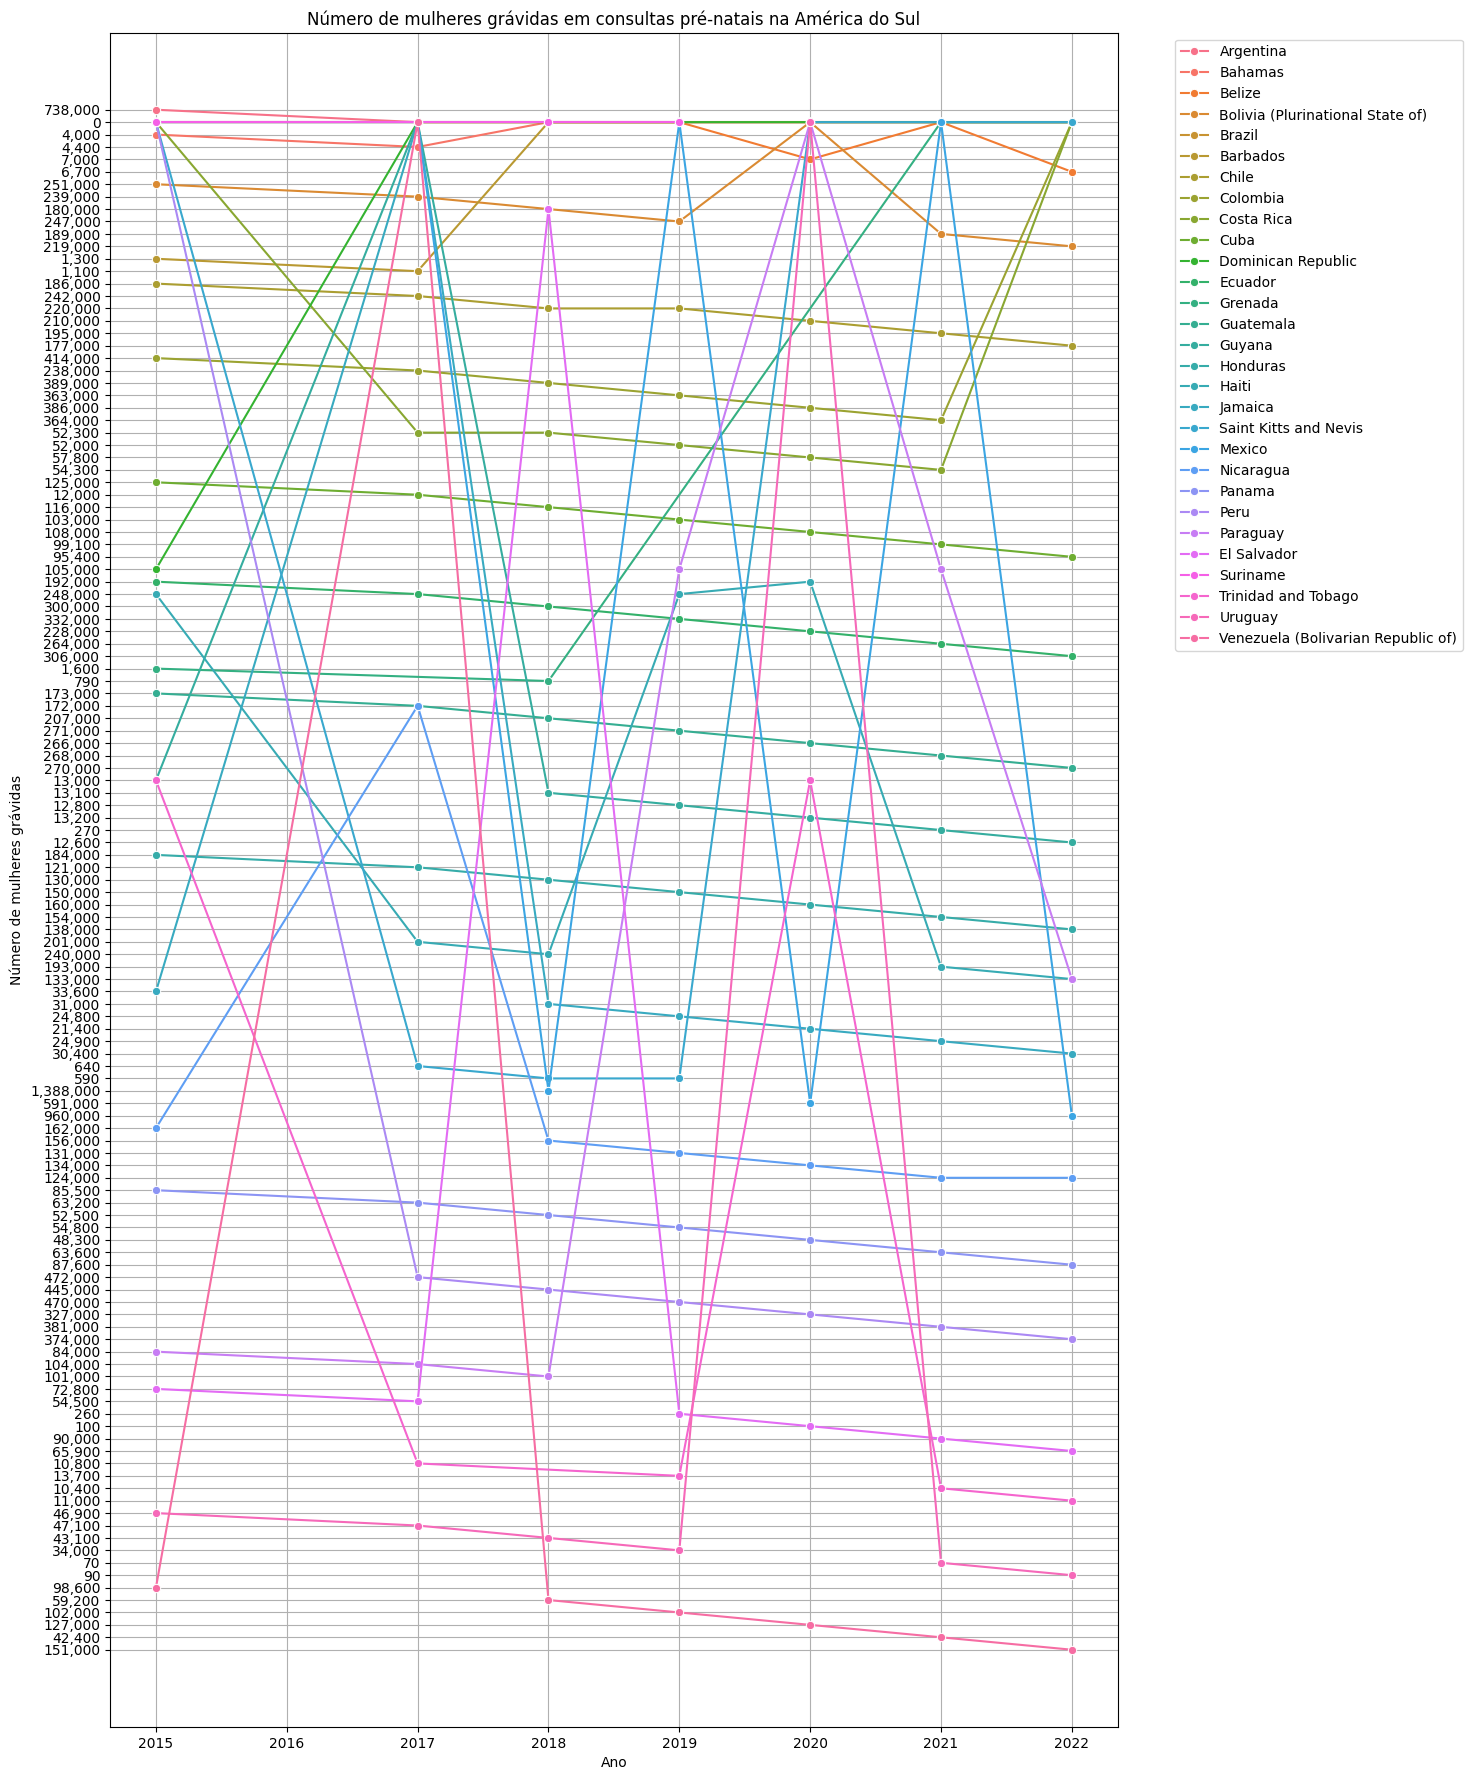

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(13, 22))
sns.lineplot(data=dados_americasul, x='Year', y='Value', hue='Country/Region', marker='o')
plt.title('Número de mulheres grávidas em consultas pré-natais na América do Sul')
plt.xlabel('Ano')
plt.ylabel('Número de mulheres grávidas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

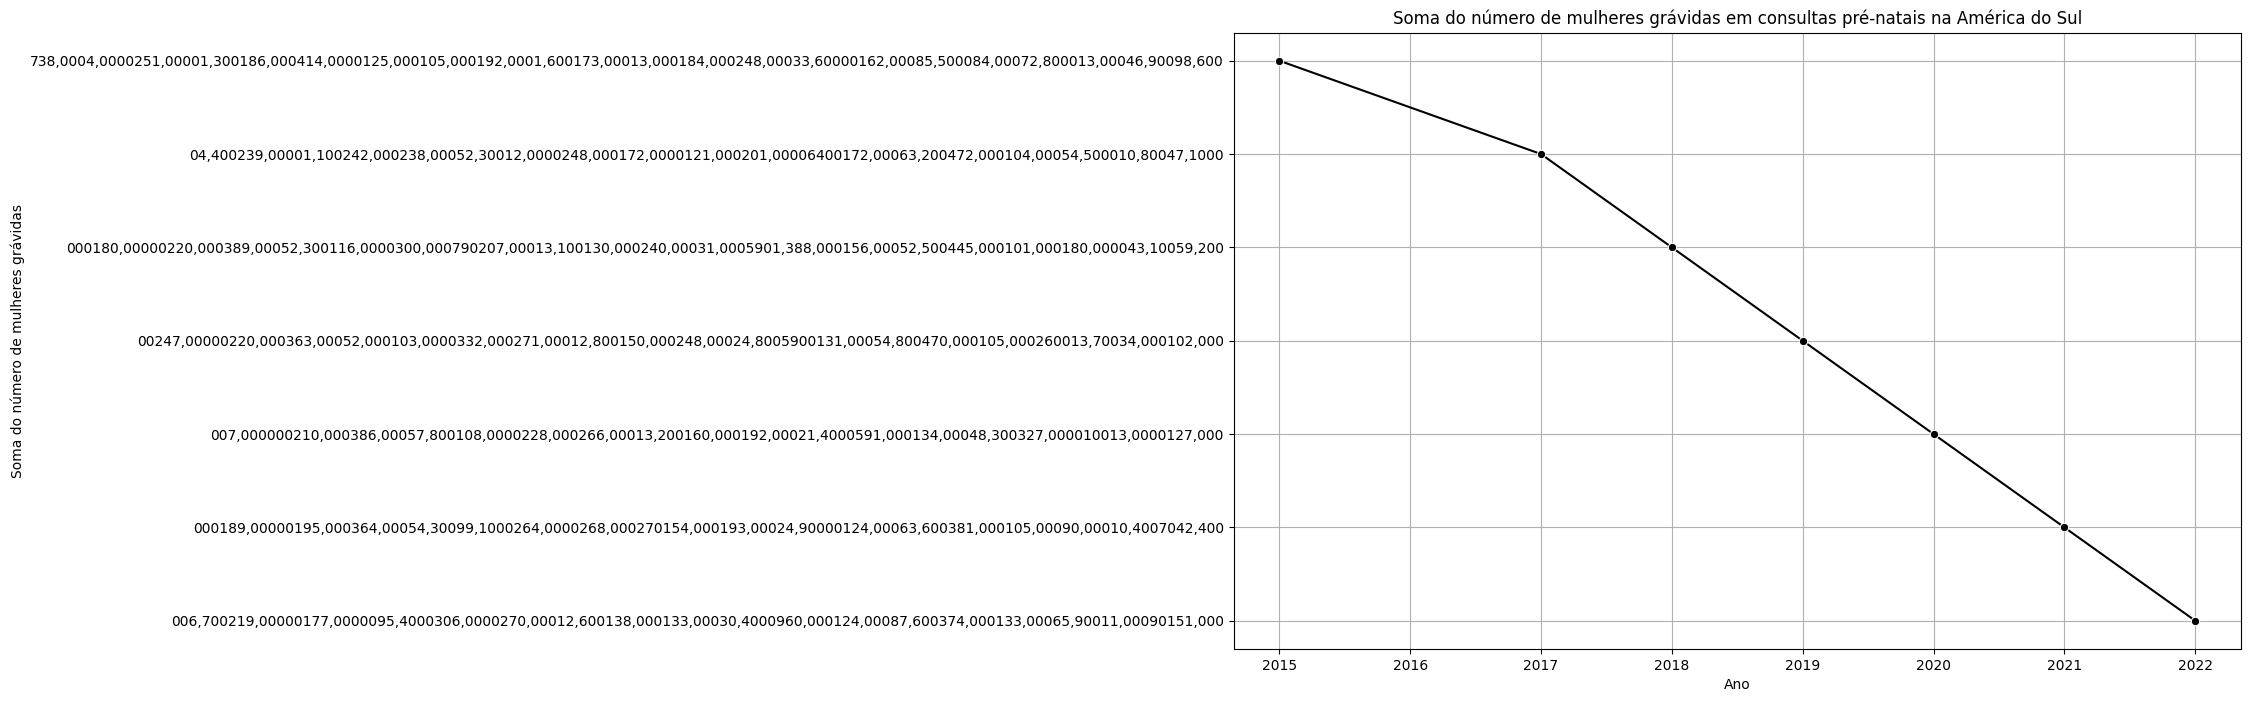

In [ ]:
# Calculando a soma dos valores para todos os países ao longo dos anos
dados_americasul_total = dados_americasul.groupby('Year')['Value'].sum().reset_index()

# Criando o gráfico de linha apenas para a soma de todos os países
plt.figure(figsize=(13, 8))
sns.lineplot(data=dados_americasul_total, x='Year', y='Value', color='black', marker='o')
plt.title('Soma do número de mulheres grávidas em consultas pré-natais na América do Sul')
plt.xlabel('Ano')
plt.ylabel('Soma do número de mulheres grávidas')
plt.grid(True)
plt.show()


Brasil

In [ ]:
# Filtrando os dados apenas para o Brasil
dados_brasil_anc = dados_anc[(dados_anc['Country/Region'] == 'Brazil') &
                     (dados_anc['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_anc['Indicator'] == 'Number of pregnant women presenting at ANC who were tested for HIV or already knew their HIV positive status')]

# Verificando os dados filtrados
print(dados_brasil_anc.head())

    ISO3     Type Country/Region                UNICEF Region  \
212  BRA  Country         Brazil  Latin America and Caribbean   
213  BRA  Country         Brazil  Latin America and Caribbean   
214  BRA  Country         Brazil  Latin America and Caribbean   
215  BRA  Country         Brazil  Latin America and Caribbean   
216  BRA  Country         Brazil  Latin America and Caribbean   

                                             Indicator  \
212  Number of pregnant women presenting at ANC who...   
213  Number of pregnant women presenting at ANC who...   
214  Number of pregnant women presenting at ANC who...   
215  Number of pregnant women presenting at ANC who...   
216  Number of pregnant women presenting at ANC who...   

                Data source  Year Value  
212  Global AIDS Monitoring  2015     0  
213  Global AIDS Monitoring  2017     0  
214  Global AIDS Monitoring  2018     0  
215  Global AIDS Monitoring  2019     0  
216  Global AIDS Monitoring  2020     0  


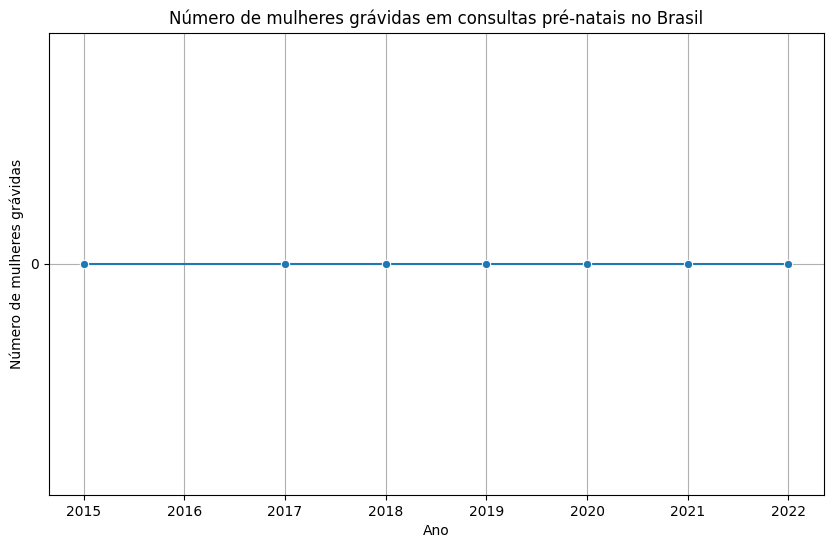

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_brasil_anc, x='Year', y='Value', marker='o')
plt.title('Número de mulheres grávidas em consultas pré-natais no Brasil')
plt.xlabel('Ano')
plt.ylabel('Número de mulheres grávidas')
plt.grid(True)
plt.show()


Argentina

In [ ]:
# Filtrando os dados apenas para o Brasil
dados_argentina_anc = dados_anc[(dados_anc['Country/Region'] == 'Argentina') &
                     (dados_anc['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_anc['Indicator'] == 'Number of pregnant women presenting at ANC who were tested for HIV or already knew their HIV positive status')]

# Verificando os dados filtrados
print(dados_argentina_anc.head())

   ISO3     Type Country/Region                UNICEF Region  \
56  ARG  Country      Argentina  Latin America and Caribbean   
57  ARG  Country      Argentina  Latin America and Caribbean   
58  ARG  Country      Argentina  Latin America and Caribbean   
59  ARG  Country      Argentina  Latin America and Caribbean   
60  ARG  Country      Argentina  Latin America and Caribbean   

                                            Indicator             Data source  \
56  Number of pregnant women presenting at ANC who...  Global AIDS Monitoring   
57  Number of pregnant women presenting at ANC who...  Global AIDS Monitoring   
58  Number of pregnant women presenting at ANC who...  Global AIDS Monitoring   
59  Number of pregnant women presenting at ANC who...  Global AIDS Monitoring   
60  Number of pregnant women presenting at ANC who...  Global AIDS Monitoring   

    Year    Value  
56  2015  738,000  
57  2017        0  
58  2018        0  
59  2019        0  
60  2020        0  


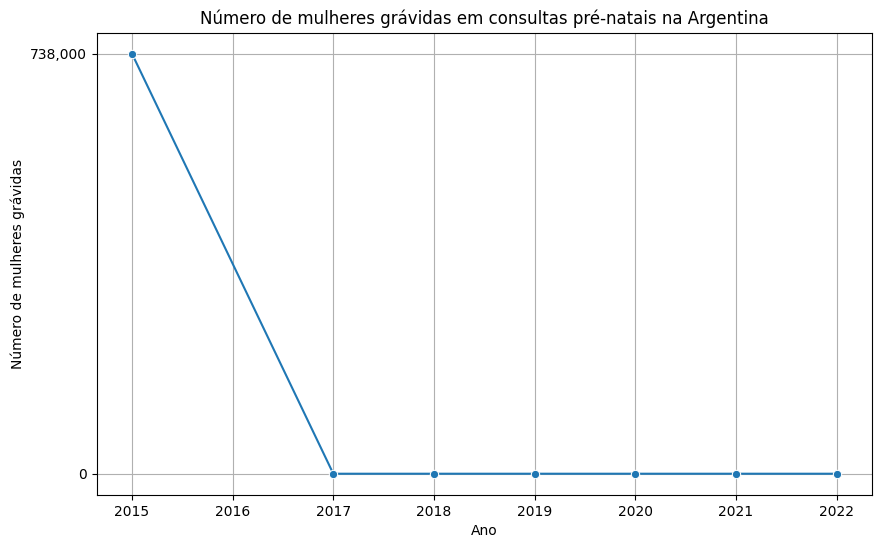

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_argentina_anc, x='Year', y='Value', marker='o')
plt.title('Número de mulheres grávidas em consultas pré-natais na Argentina')
plt.xlabel('Ano')
plt.ylabel('Número de mulheres grávidas')
plt.grid(True)
plt.show()


Guatemala

In [ ]:
# Filtrando os dados apenas para o Brasil
dados_guatemala_anc = dados_anc[(dados_anc['Country/Region'] == 'Guatemala') &
                     (dados_anc['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_anc['Indicator'] == 'Number of pregnant women presenting at ANC who were tested for HIV or already knew their HIV positive status')]

# Verificando os dados filtrados
print(dados_guatemala_anc.head())

    ISO3     Type Country/Region                UNICEF Region  \
622  GTM  Country      Guatemala  Latin America and Caribbean   
623  GTM  Country      Guatemala  Latin America and Caribbean   
624  GTM  Country      Guatemala  Latin America and Caribbean   
625  GTM  Country      Guatemala  Latin America and Caribbean   
626  GTM  Country      Guatemala  Latin America and Caribbean   

                                             Indicator  \
622  Number of pregnant women presenting at ANC who...   
623  Number of pregnant women presenting at ANC who...   
624  Number of pregnant women presenting at ANC who...   
625  Number of pregnant women presenting at ANC who...   
626  Number of pregnant women presenting at ANC who...   

                Data source  Year    Value  
622  Global AIDS Monitoring  2015  173,000  
623  Global AIDS Monitoring  2017  172,000  
624  Global AIDS Monitoring  2018  207,000  
625  Global AIDS Monitoring  2019  271,000  
626  Global AIDS Monitoring  2020  

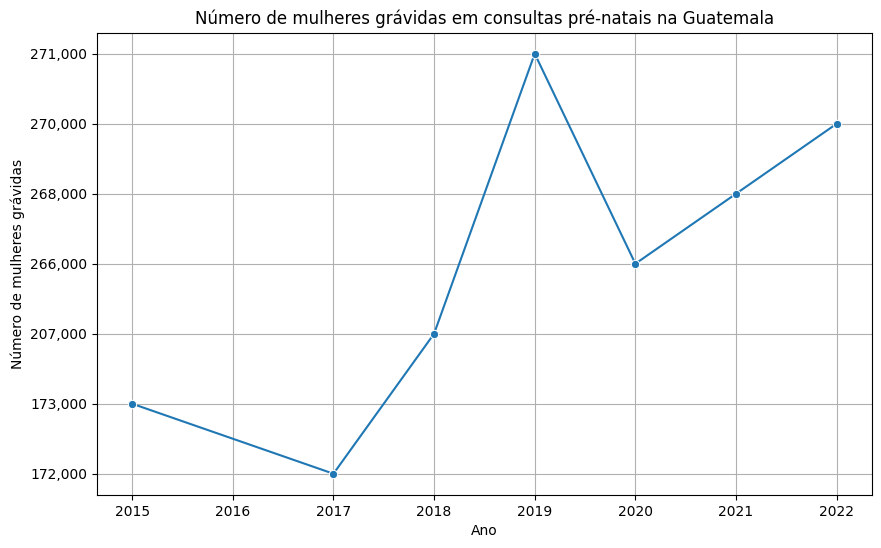

In [ ]:
# Ordenando os dados pela coluna 'Value' em ordem decrescente
dados_guatemala_sorted_anc = dados_guatemala_anc.sort_values(by='Value', ascending=False)

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_guatemala_sorted_anc, x='Year', y='Value', marker='o')
plt.title('Número de mulheres grávidas em consultas pré-natais na Guatemala')
plt.xlabel('Ano')
plt.ylabel('Número de mulheres grávidas')
plt.grid(True)
plt.show()

# Análise Geral - Tabela Diagnótico Infantil de HIV

In [ ]:
dados_eid = pd.read_excel("/content/drive/MyDrive/HIV_Early_Infant_Diagnosis_2023.xlsx", sheet_name="Data",header=1)
display(dados_eid)

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value,Lower,Upper
0,03M49WLD,Region,Global,NaN,Per cent of infants born to pregnant women liv...,Global AIDS Monitoring and UNAIDS 2023 estimates,2011,37.3,30.5,47.5
1,03M49WLD,Region,Global,NaN,Per cent of infants born to pregnant women liv...,Global AIDS Monitoring and UNAIDS 2023 estimates,2012,41.9,34.6,53.5
2,03M49WLD,Region,Global,NaN,Per cent of infants born to pregnant women liv...,Global AIDS Monitoring and UNAIDS 2023 estimates,2013,40.4,33.6,52.0
3,03M49WLD,Region,Global,NaN,Per cent of infants born to pregnant women liv...,Global AIDS Monitoring and UNAIDS 2023 estimates,2014,41.9,34.8,53.6
4,03M49WLD,Region,Global,NaN,Per cent of infants born to pregnant women liv...,Global AIDS Monitoring and UNAIDS 2023 estimates,2015,51.2,42.7,65.2
...,...,...,...,...,...,...,...,...,...,...
2115,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2017,"41,400",NaN,NaN
2116,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2018,"40,000",NaN,NaN
2117,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2019,"35,400",NaN,NaN
2118,ZWE,Country,Zimbabwe,Eastern and Southern Africa,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2020,"44,600",NaN,NaN


In [ ]:
# Número de linhas e colunas do arquivo
dados_eid.shape

(2120, 10)

In [ ]:
dados_eid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ISO3            2120 non-null   object
 1   Type            2120 non-null   object
 2   Country/Region  2120 non-null   object
 3   UNICEF Region   1834 non-null   object
 4   Indicator       2120 non-null   object
 5   Data source     2120 non-null   object
 6   Year            2120 non-null   int64 
 7   Value           2120 non-null   object
 8   Lower           999 non-null    object
 9   Upper           999 non-null    object
dtypes: int64(1), object(9)
memory usage: 165.8+ KB


In [ ]:
# verificando o tipo dos dados
dados_eid.dtypes.value_counts()

,count
object,9
int64,1


In [ ]:
# verificando valores nulos
dados_eid.isnull().sum().sort_values(ascending=False)

,0
Lower,1121
Upper,1121
UNICEF Region,286
ISO3,0
Type,0
Country/Region,0
Indicator,0
Data source,0
Year,0
Value,0


# Observando dados de uma região específica

America do Sul


In [ ]:
# Filtrando os dados para países da América do Sul e para o indicador específico
dados_americasul_eid = dados_eid[(dados_eid['UNICEF Region'] == 'Latin America and Caribbean') &
                         (dados_eid['Indicator'] == 'Reported number of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth')]

In [ ]:
dados_americasul_eid.head()

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value,Lower,Upper
171,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2011,80,NaN,NaN
172,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2012,70,NaN,NaN
173,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2013,70,NaN,NaN
174,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2014,60,NaN,NaN
175,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of infants born to pregnant wo...,Global AIDS Monitoring,2015,60,NaN,NaN


In [ ]:
# Verificar o tamanho do DataFrame dados_americasul_eid
tamanho = dados_americasul_eid.shape
print("Número de linhas e colunas:", tamanho)

Número de linhas e colunas: (218, 10)


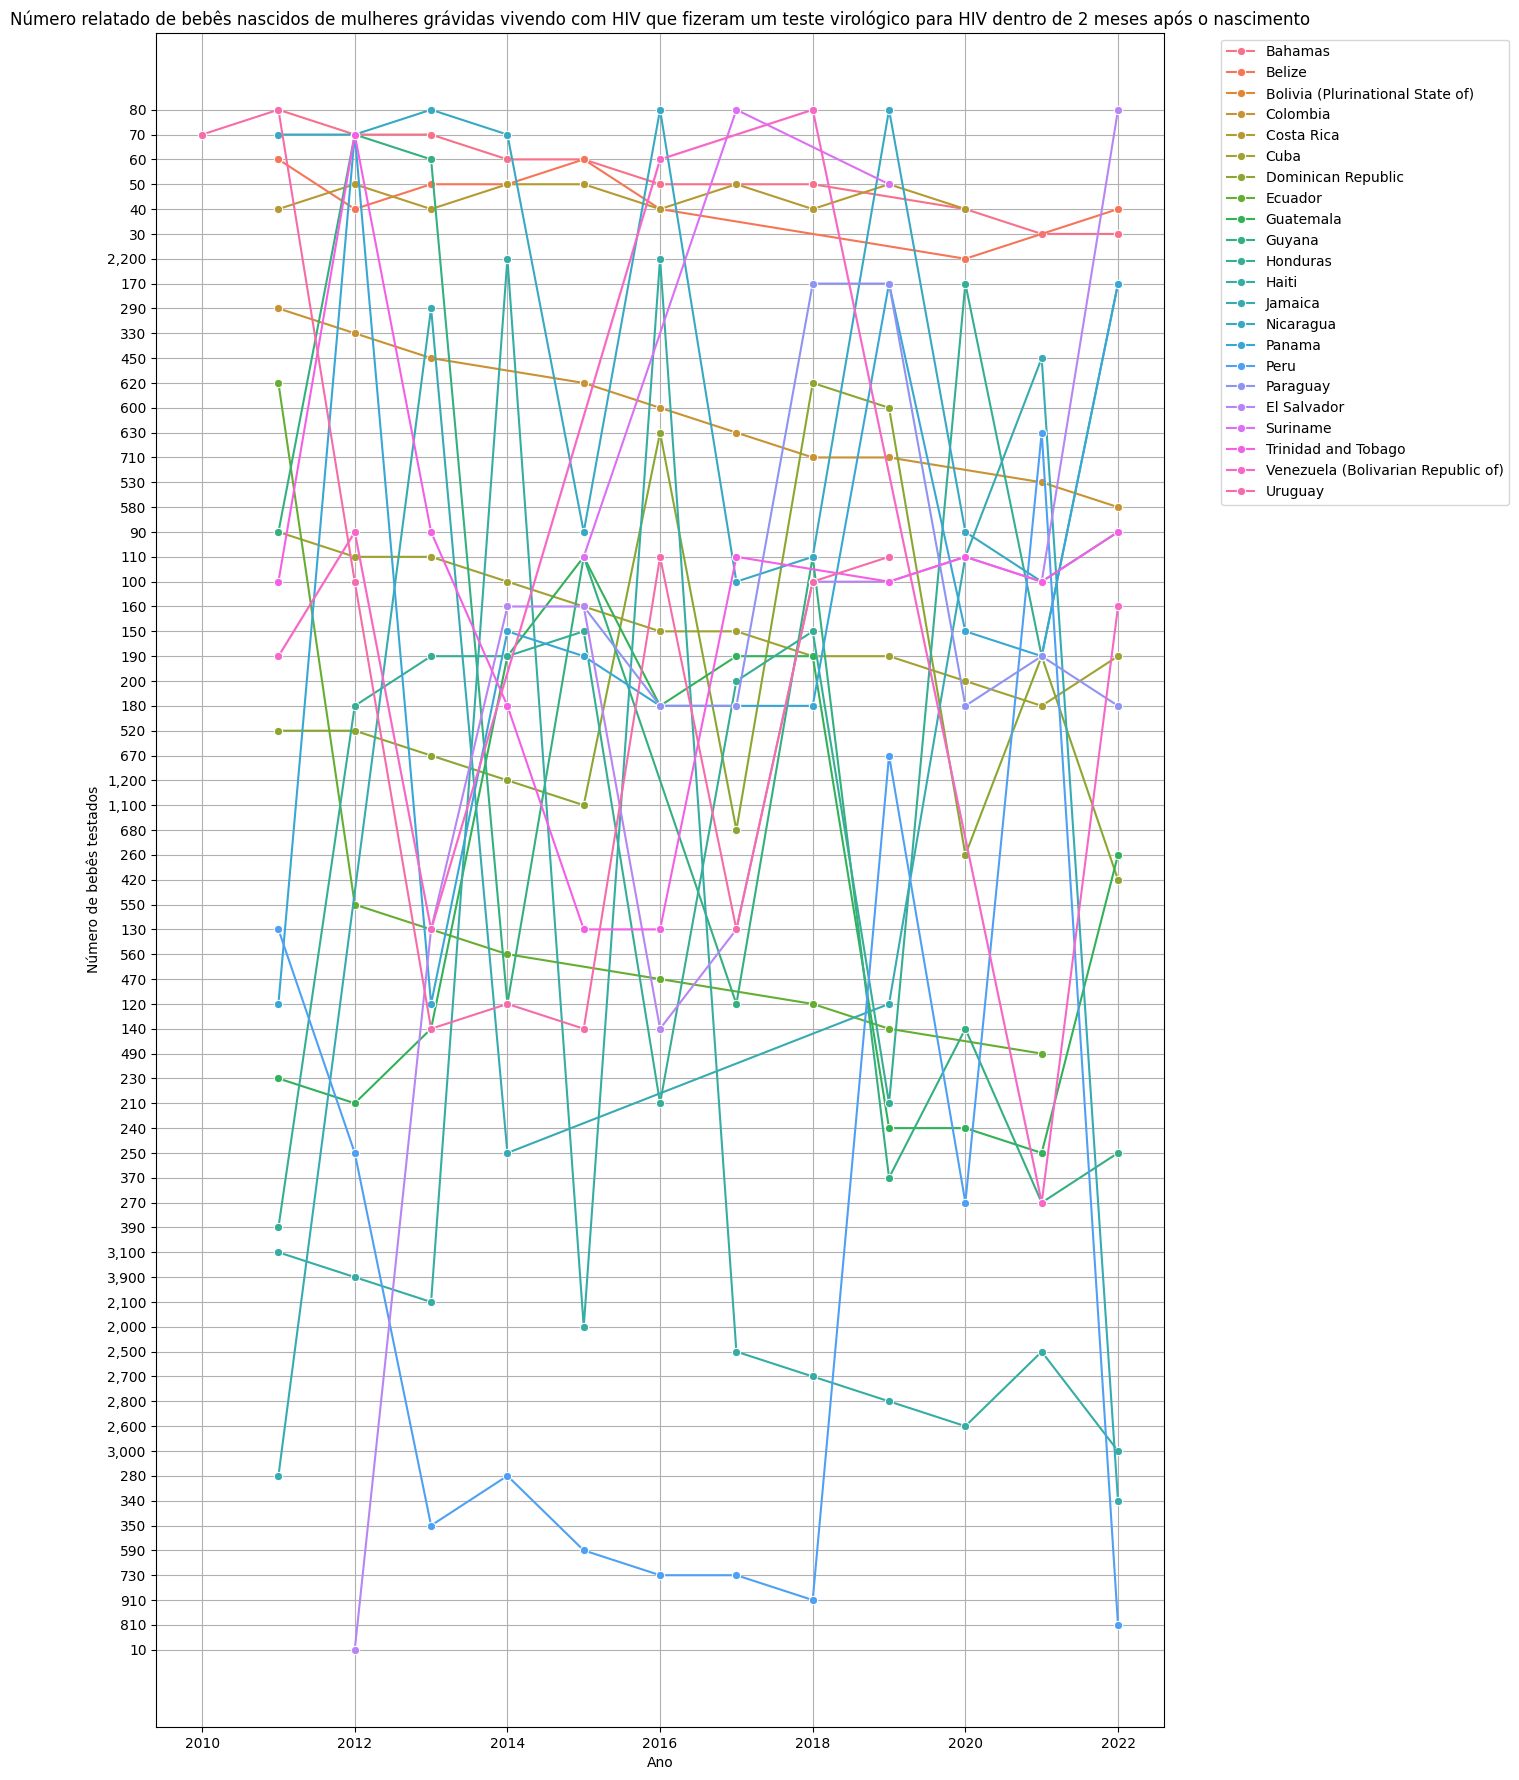

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(13, 22))
sns.lineplot(data=dados_americasul_eid, x='Year', y='Value', hue='Country/Region', marker='o')
plt.title('Número relatado de bebês nascidos de mulheres grávidas vivendo com HIV que fizeram um teste virológico para HIV dentro de 2 meses após o nascimento')
plt.xlabel('Ano')
plt.ylabel('Número de bebês testados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Brasil

In [ ]:
# Filtrando os dados apenas para o Brasil
dados_brasil_eid = dados_eid[(dados_eid['Country/Region'] == 'Brazil') &
                     (dados_eid['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_eid['Indicator'] == 'Reported number of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth')]

# Verificando os dados filtrados
print(dados_brasil_eid.head())

Empty DataFrame
Columns: [ISO3, Type, Country/Region, UNICEF Region, Indicator, Data source, Year, Value, Lower, Upper]
Index: []


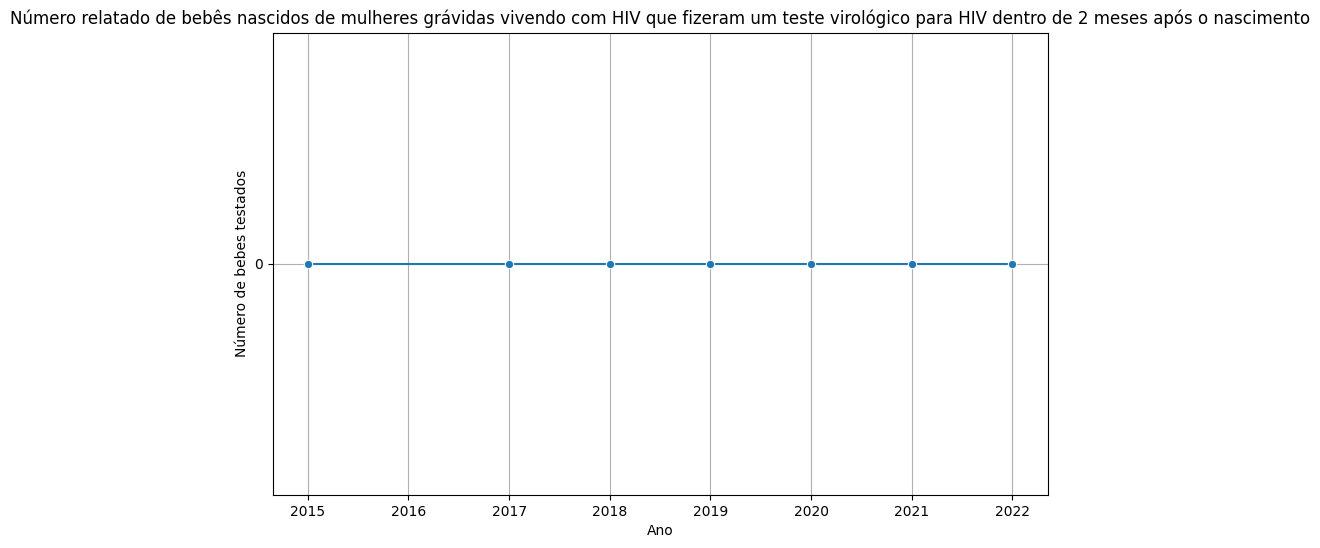

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_brasil_anc, x='Year', y='Value', marker='o')
plt.title('Número relatado de bebês nascidos de mulheres grávidas vivendo com HIV que fizeram um teste virológico para HIV dentro de 2 meses após o nascimento')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()


Argentina

In [ ]:
# Filtrando os dados apenas para a Argentina
dados_argentina_eid = dados_eid[(dados_eid['Country/Region'] == 'Argentina') &
                     (dados_eid['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_eid['Indicator'] == 'Reported number of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth')]

# Verificando os dados filtrados
print(dados_argentina_eid.head())

Empty DataFrame
Columns: [ISO3, Type, Country/Region, UNICEF Region, Indicator, Data source, Year, Value, Lower, Upper]
Index: []


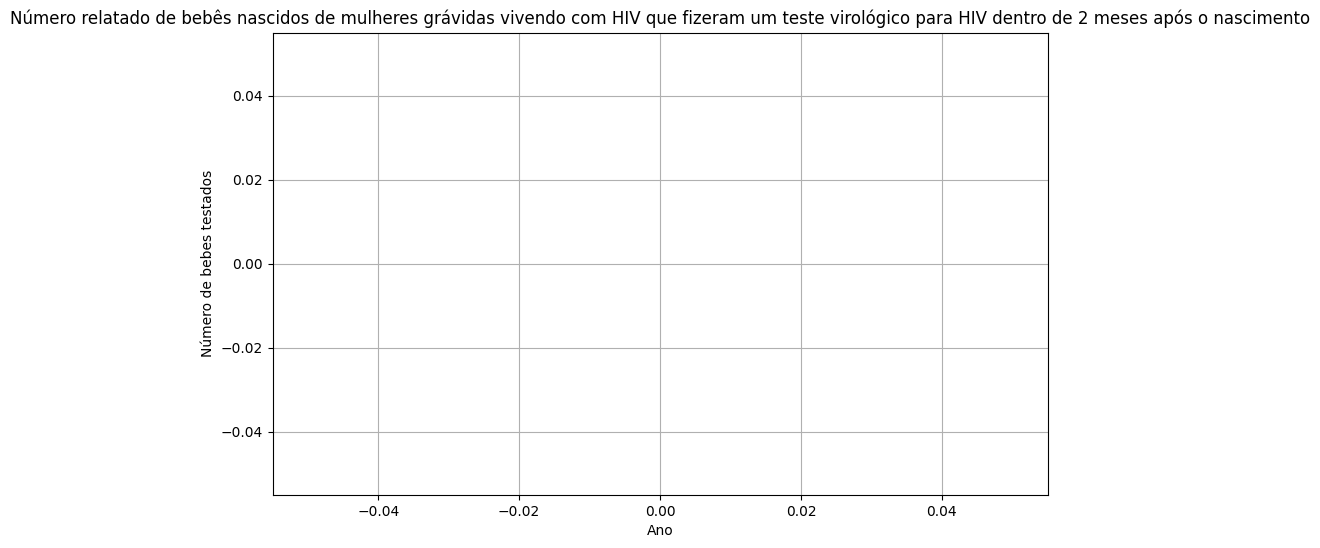

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_argentina_eid, x='Year', y='Value', marker='o')
plt.title('Número relatado de bebês nascidos de mulheres grávidas vivendo com HIV que fizeram um teste virológico para HIV dentro de 2 meses após o nascimento')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()

Guatemala

In [ ]:
# Filtrando os dados apenas para a Guatemala
dados_guatemala_eid = dados_eid[(dados_eid['Country/Region'] == 'Guatemala') &
                     (dados_eid['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_eid['Indicator'] == 'Reported number of infants born to pregnant women living with HIV who received a virological test for HIV within 2 months of birth')]

# Verificando os dados filtrados
print(dados_guatemala_eid.head())

    ISO3     Type Country/Region                UNICEF Region  \
670  GTM  Country      Guatemala  Latin America and Caribbean   
671  GTM  Country      Guatemala  Latin America and Caribbean   
672  GTM  Country      Guatemala  Latin America and Caribbean   
673  GTM  Country      Guatemala  Latin America and Caribbean   
674  GTM  Country      Guatemala  Latin America and Caribbean   

                                             Indicator  \
670  Reported number of infants born to pregnant wo...   
671  Reported number of infants born to pregnant wo...   
672  Reported number of infants born to pregnant wo...   
673  Reported number of infants born to pregnant wo...   
674  Reported number of infants born to pregnant wo...   

                Data source  Year Value Lower Upper  
670  Global AIDS Monitoring  2011   230   NaN   NaN  
671  Global AIDS Monitoring  2012   210   NaN   NaN  
672  Global AIDS Monitoring  2013   140   NaN   NaN  
673  Global AIDS Monitoring  2014   190   Na

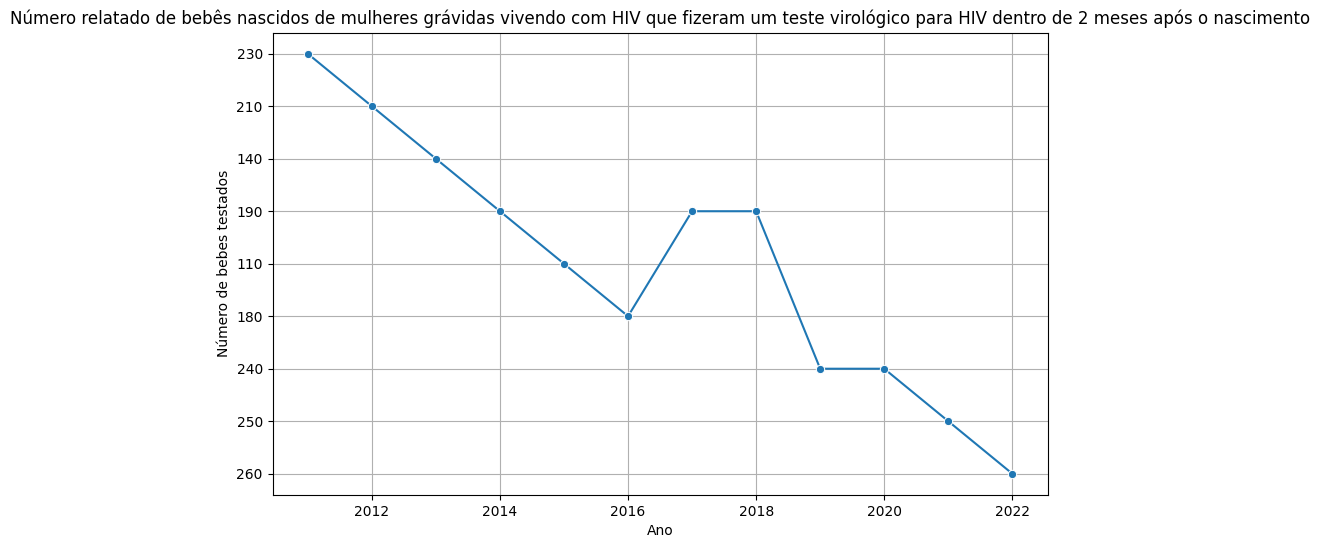

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_guatemala_eid, x='Year', y='Value', marker='o')
plt.title('Número relatado de bebês nascidos de mulheres grávidas vivendo com HIV que fizeram um teste virológico para HIV dentro de 2 meses após o nascimento')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()

# Análise Geral - Tabela Cobertura do tratamento de antirretroviral (TAR) em crianças vivendo com HIV

In [ ]:
dados_art = pd.read_excel("/content/drive/MyDrive/HIV_Paediatric_ART_Coverage_2023.xlsx", sheet_name="Data",header=1)
display(dados_art)

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value,Lower,Upper
0,03M49WLD,Region,Global,NaN,Per cent of children living with HIV receiving...,Global AIDS Monitoring and UNAIDS 2023 estimates,2010,16.7,13.0,22.9
1,03M49WLD,Region,Global,NaN,Per cent of children living with HIV receiving...,Global AIDS Monitoring and UNAIDS 2023 estimates,2011,21.1,16.4,28.8
2,03M49WLD,Region,Global,NaN,Per cent of children living with HIV receiving...,Global AIDS Monitoring and UNAIDS 2023 estimates,2012,25.4,19.8,34.7
3,03M49WLD,Region,Global,NaN,Per cent of children living with HIV receiving...,Global AIDS Monitoring and UNAIDS 2023 estimates,2013,29.4,22.9,40.2
4,03M49WLD,Region,Global,NaN,Per cent of children living with HIV receiving...,Global AIDS Monitoring and UNAIDS 2023 estimates,2014,34.5,26.8,47.1
...,...,...,...,...,...,...,...,...,...,...
2967,regionWCA,Region,West and Central Africa,NaN,Reported number of children receiving ART,Global AIDS Monitoring,2018,"123,000",NaN,NaN
2968,regionWCA,Region,West and Central Africa,NaN,Reported number of children receiving ART,Global AIDS Monitoring,2019,"129,000",NaN,NaN
2969,regionWCA,Region,West and Central Africa,NaN,Reported number of children receiving ART,Global AIDS Monitoring,2020,"137,000",NaN,NaN
2970,regionWCA,Region,West and Central Africa,NaN,Reported number of children receiving ART,Global AIDS Monitoring,2021,"142,000",NaN,NaN


In [ ]:
# Número de linhas e colunas do arquivo
dados_art.shape

(2972, 10)

In [ ]:
dados_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ISO3            2972 non-null   object
 1   Type            2972 non-null   object
 2   Country/Region  2972 non-null   object
 3   UNICEF Region   2766 non-null   object
 4   Indicator       2972 non-null   object
 5   Data source     2972 non-null   object
 6   Year            2972 non-null   int64 
 7   Value           2972 non-null   object
 8   Lower           1273 non-null   object
 9   Upper           1273 non-null   object
dtypes: int64(1), object(9)
memory usage: 232.3+ KB


In [ ]:
# verificando o tipo dos dados
dados_art.dtypes.value_counts()

,count
object,9
int64,1


In [ ]:
# verificando valores nulos
dados_art.isnull().sum().sort_values(ascending=False)

,0
Lower,1699
Upper,1699
UNICEF Region,206
ISO3,0
Type,0
Country/Region,0
Indicator,0
Data source,0
Year,0
Value,0


# Observando dados de uma região específica

América do Sul

In [ ]:
# Filtrando os dados para países da América do Sul e para o indicador específico
dados_americasul_art = dados_art[(dados_art['UNICEF Region'] == 'Latin America and Caribbean') &
                         (dados_art['Indicator'] == 'Reported number of children receiving ART')]

In [ ]:
dados_americasul_art.head()

,ISO3,Type,Country/Region,UNICEF Region,Indicator,Data source,Year,Value,Lower,Upper
258,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of children receiving ART,Global AIDS Monitoring,2010,70,NaN,NaN
259,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of children receiving ART,Global AIDS Monitoring,2011,50,NaN,NaN
260,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of children receiving ART,Global AIDS Monitoring,2012,40,NaN,NaN
261,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of children receiving ART,Global AIDS Monitoring,2013,50,NaN,NaN
262,BHS,Country,Bahamas,Latin America and Caribbean,Reported number of children receiving ART,Global AIDS Monitoring,2014,40,NaN,NaN


In [ ]:
# Verificar o tamanho do DataFrame dados_americasul
tamanho = dados_americasul_art.shape
print("Número de linhas e colunas:", tamanho)

Número de linhas e colunas: (311, 10)


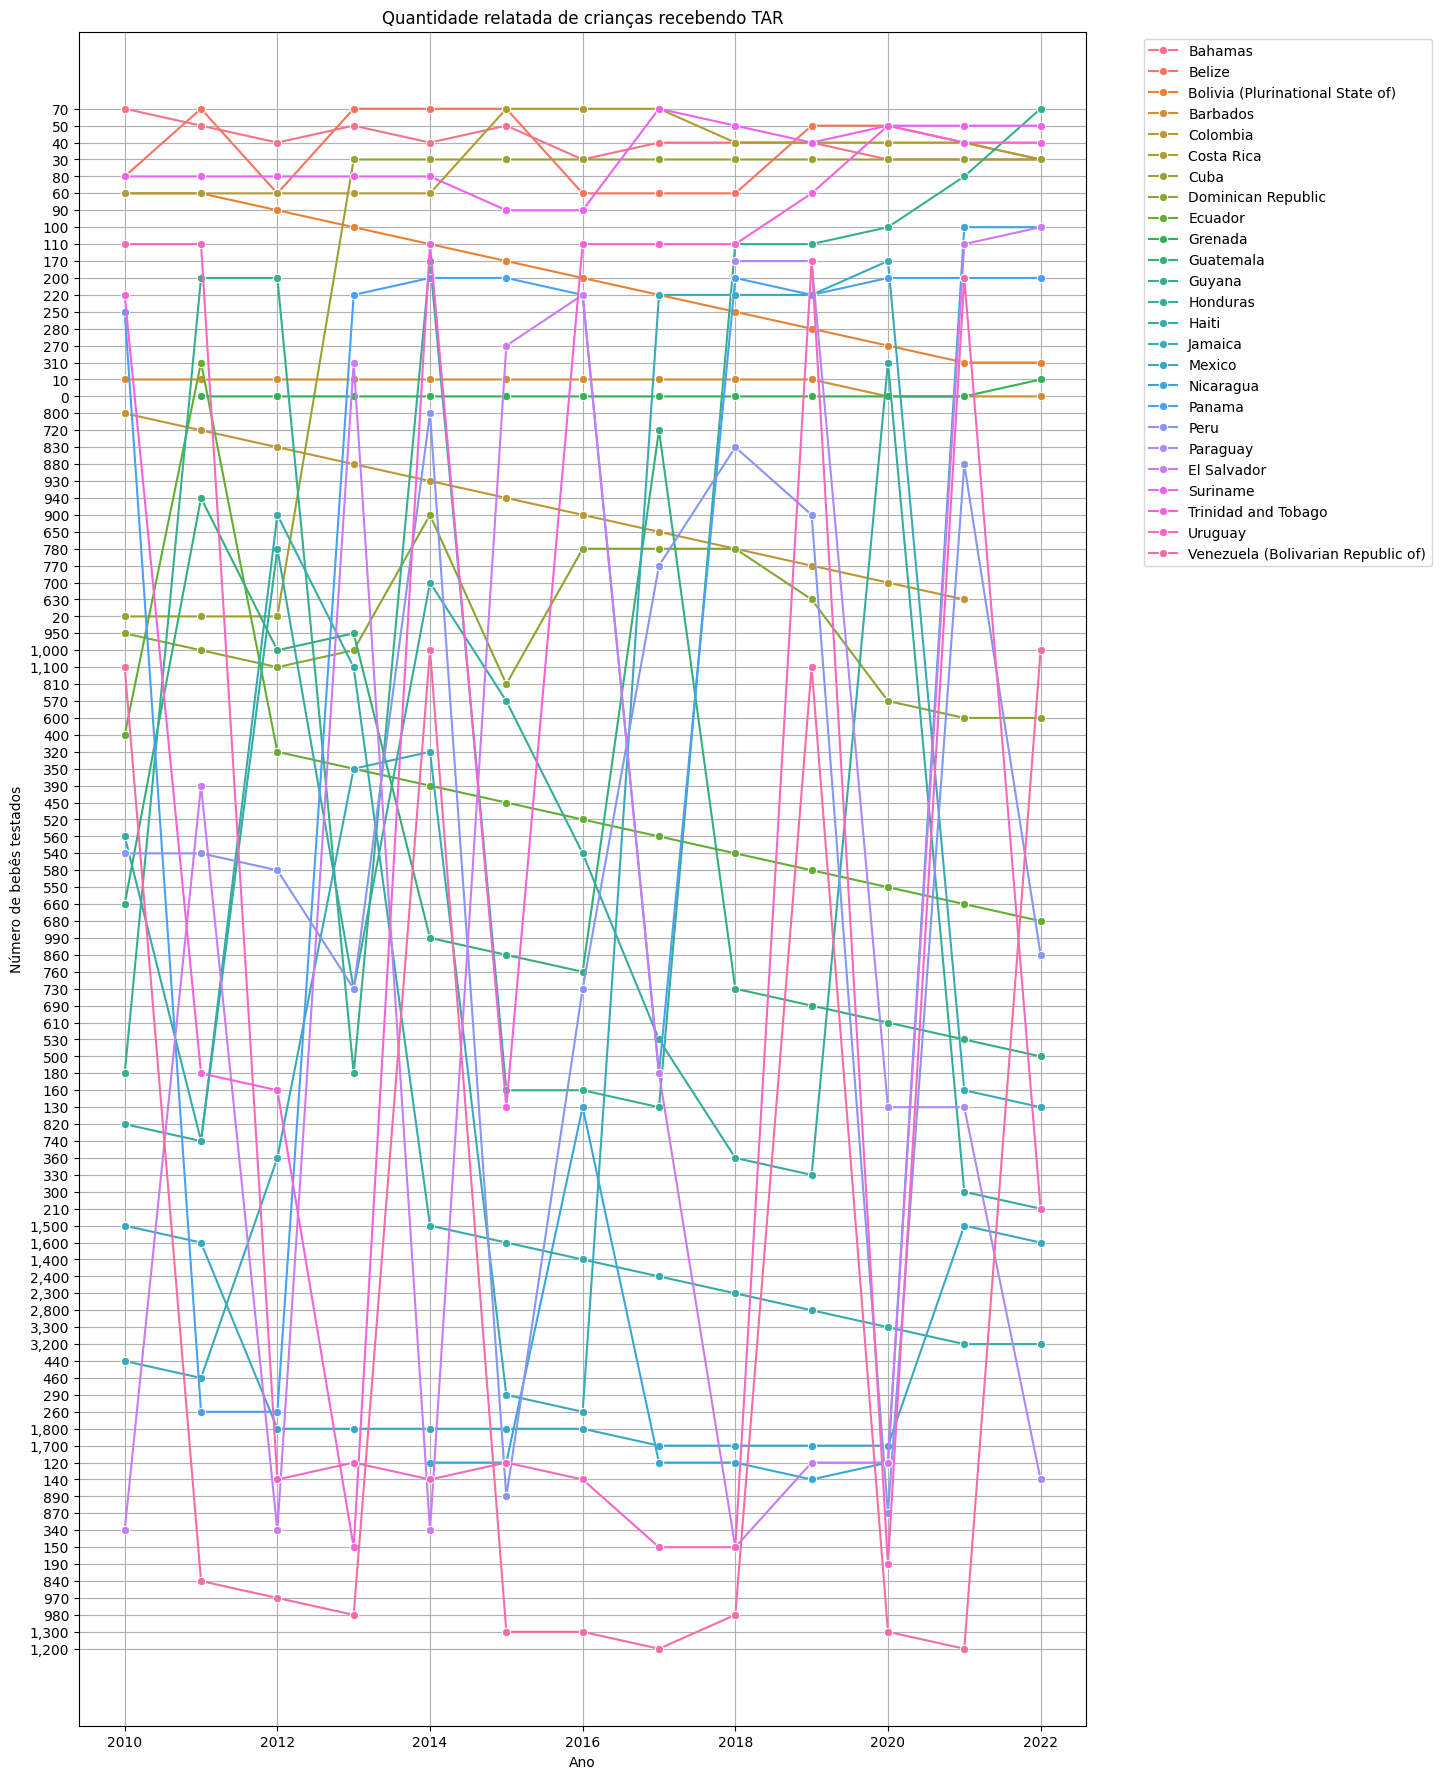

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(13, 22))
sns.lineplot(data=dados_americasul_art, x='Year', y='Value', hue='Country/Region', marker='o')
plt.title('Quantidade relatada de crianças recebendo TAR')
plt.xlabel('Ano')
plt.ylabel('Número de bebês testados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Brasil

In [ ]:
# Filtrando os dados apenas para o Brasil
dados_brasil_art = dados_art[(dados_art['Country/Region'] == 'Brazil') &
                     (dados_art['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_art['Indicator'] == 'Reported number of children receiving ART')]

# Verificando os dados filtrados
print(dados_brasil_art.head())

Empty DataFrame
Columns: [ISO3, Type, Country/Region, UNICEF Region, Indicator, Data source, Year, Value, Lower, Upper]
Index: []


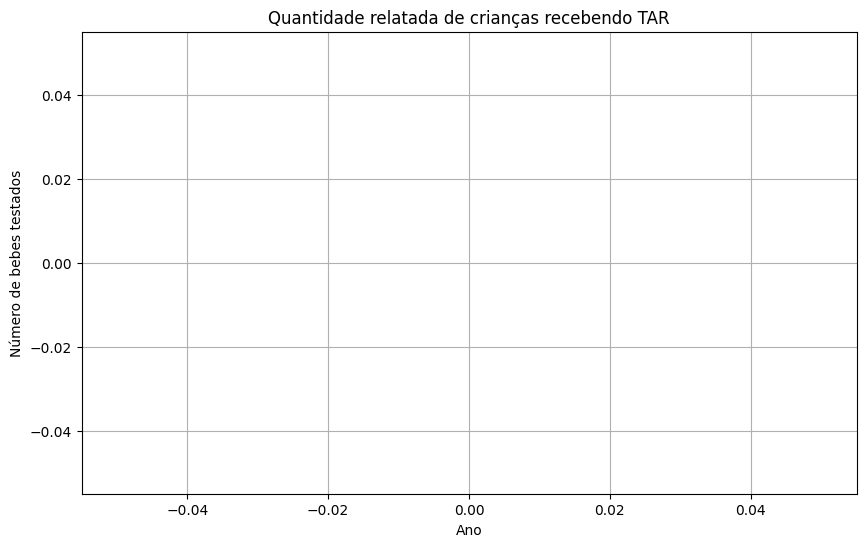

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_brasil_art, x='Year', y='Value', marker='o')
plt.title('Quantidade relatada de crianças recebendo TAR')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()

Argentina

In [ ]:
# Filtrando os dados apenas para a Argentina
dados_argentina_art = dados_art[(dados_art['Country/Region'] == 'Argentina') &
                     (dados_art['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_art['Indicator'] == 'Reported number of children receiving ART')]

# Verificando os dados filtrados
print(dados_argentina_art.head())

Empty DataFrame
Columns: [ISO3, Type, Country/Region, UNICEF Region, Indicator, Data source, Year, Value, Lower, Upper]
Index: []


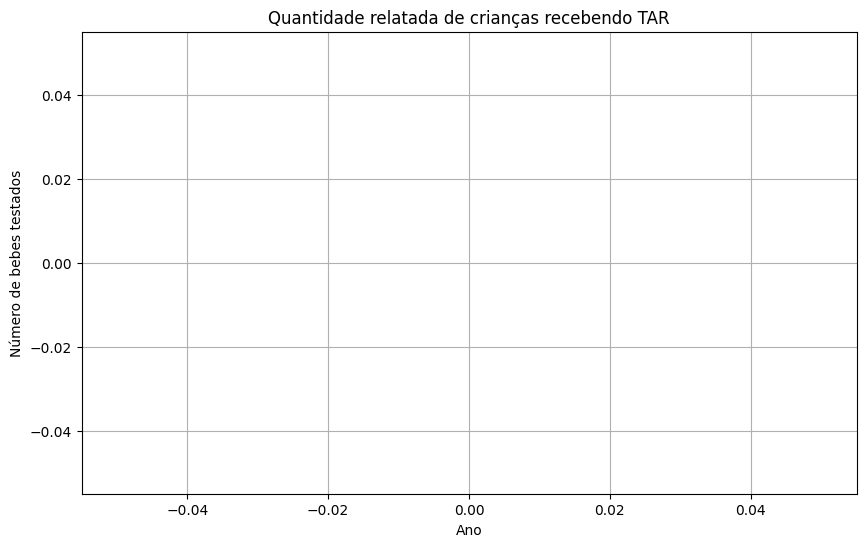

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_argentina_art, x='Year', y='Value', marker='o')
plt.title('Quantidade relatada de crianças recebendo TAR')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()

Guatemala

In [ ]:
# Filtrando os dados apenas para a Guatemala
dados_guatemala_art = dados_art[(dados_art['Country/Region'] == 'Guatemala') &
                     (dados_art['UNICEF Region'] == 'Latin America and Caribbean') &
                     (dados_art['Indicator'] == 'Reported number of children receiving ART')]

# Verificando os dados filtrados
print(dados_guatemala_art.head())

     ISO3     Type Country/Region                UNICEF Region  \
1048  GTM  Country      Guatemala  Latin America and Caribbean   
1049  GTM  Country      Guatemala  Latin America and Caribbean   
1050  GTM  Country      Guatemala  Latin America and Caribbean   
1051  GTM  Country      Guatemala  Latin America and Caribbean   
1052  GTM  Country      Guatemala  Latin America and Caribbean   

                                      Indicator             Data source  Year  \
1048  Reported number of children receiving ART  Global AIDS Monitoring  2010   
1049  Reported number of children receiving ART  Global AIDS Monitoring  2011   
1050  Reported number of children receiving ART  Global AIDS Monitoring  2012   
1051  Reported number of children receiving ART  Global AIDS Monitoring  2013   
1052  Reported number of children receiving ART  Global AIDS Monitoring  2014   

      Value Lower Upper  
1048    660   NaN   NaN  
1049    940   NaN   NaN  
1050  1,000   NaN   NaN  
1051    950 

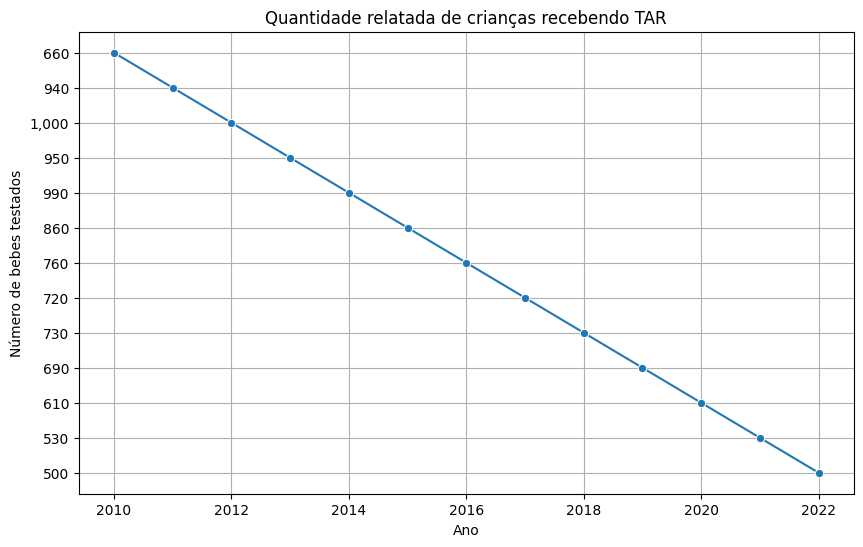

In [ ]:
# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_guatemala_art, x='Year', y='Value', marker='o')
plt.title('Quantidade relatada de crianças recebendo TAR')
plt.xlabel('Ano')
plt.ylabel('Número de bebes testados')
plt.grid(True)
plt.show()